### Intelligent Robotics Python Library 사용 예제
### CoppelliaSim Simulation 
### Example7 - UR5 Forward Kinematics
##### Written by Dongil Choi, dongilc@mju.ac.kr
##### BSD License.

In [1]:
import intelligent_robotics as ir
import sympy
sympy.init_printing()

### Forward Kinematics of UR5 using Python API

#### DH Parameter를 이용한 동차변환 구하기

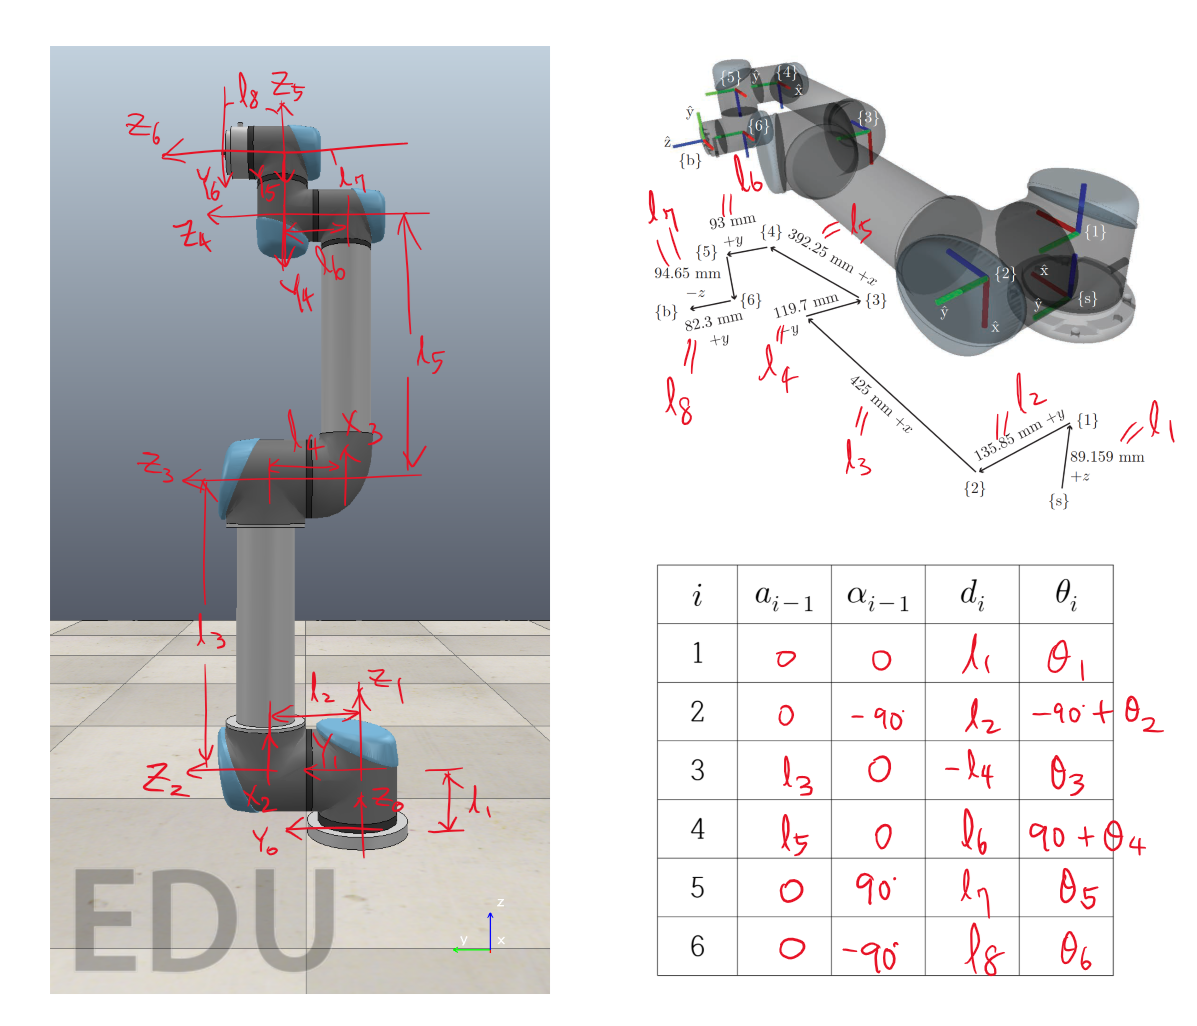

In [2]:
# Open CoppelliaSim Scene File: UR5_FK.ttt
from IPython.display import Image
Image('figure/ur5_coppellia_sim_dh.PNG', width=500)

In [3]:
theta1,theta2,theta3,theta4,theta5,theta6 = ir.dynamicsymbols('theta1,theta2,theta3,theta4,theta5,theta6')
l1,l2,l3,l4,l5,l6,l7,l8 = sympy.symbols('l1,l2,l3,l4,l5,l6,l7,l8')

In [4]:
T01 = ir.DH(0,0,l1,theta1)
T12 = ir.DH(0,-sympy.rad(90),l2,-sympy.rad(90)+theta2)
T23 = ir.DH(l3,0,-l4,theta3)
T34 = ir.DH(l5,0,l6,sympy.rad(90)+theta4)
T45 = ir.DH(0,sympy.rad(90),l7,theta5)
T56 = ir.DH(0,-sympy.rad(90),l8,theta6)

In [5]:
T06 = sympy.simplify(T01@T12@T23@T34@T45@T56)
T06

C:\Users\cdi\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\cdi\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\cdi\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\cdi\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The MathtextBackendBit

⎡-(sin(θ₁(t))⋅sin(θ₅(t)) - cos(θ₂(t) + θ₃(t) + θ₄(t))⋅cos(θ₁(t))⋅cos(θ₅(t)))⋅c
⎢                                                                             
⎢(sin(θ₁(t))⋅cos(θ₂(t) + θ₃(t) + θ₄(t))⋅cos(θ₅(t)) + sin(θ₅(t))⋅cos(θ₁(t)))⋅co
⎢                                                                             
⎢                        -sin(θ₂(t) + θ₃(t) + θ₄(t))⋅cos(θ₅(t))⋅cos(θ₆(t)) - s
⎢                                                                             
⎣                                                                    0        

os(θ₆(t)) - sin(θ₂(t) + θ₃(t) + θ₄(t))⋅sin(θ₆(t))⋅cos(θ₁(t))  (sin(θ₁(t))⋅sin(
                                                                              
s(θ₆(t)) - sin(θ₂(t) + θ₃(t) + θ₄(t))⋅sin(θ₁(t))⋅sin(θ₆(t))   -(sin(θ₁(t))⋅cos
                                                                              
in(θ₆(t))⋅cos(θ₂(t) + θ₃(t) + θ₄(t))                                          
                                                   

In [6]:
T06.subs({theta1:0,theta2:0,theta3:0,
          theta4:0,theta5:0,theta6:0,
          l1:89.159/1e3,l2:135.85/1e3,l3:425/1e3,l4:119.7/1e3,
          l5:392.25/1e3,l6:93/1e3,l7:94.65/1e3,l8:82.3/1e3})

⎡1  0   0     0    ⎤
⎢                  ⎥
⎢0  0   1  0.19145 ⎥
⎢                  ⎥
⎢0  -1  0  1.001059⎥
⎢                  ⎥
⎣0  0   0     1    ⎦

#### Inverse Kinematics

In [7]:
w_0_0 = sympy.Matrix([[0], [0], [0]])
w_1_1 = ir.get_angular_vel_R(T01, w_0_0, theta1.diff())
w_2_2 = ir.get_angular_vel_R(T12, w_1_1, theta2.diff())
w_3_3 = ir.get_angular_vel_R(T23, w_2_2, theta3.diff())
w_4_4 = ir.get_angular_vel_R(T34, w_3_3, theta4.diff())
w_5_5 = ir.get_angular_vel_R(T45, w_4_4, theta5.diff())
w_6_6 = ir.get_angular_vel_R(T56, w_5_5, theta6.diff())

v_0_0 = sympy.Matrix([[0], [0], [0]])
v_1_1 = ir.get_linear_vel_R(T01, w_0_0, v_0_0)
v_2_2 = ir.get_linear_vel_R(T12, w_1_1, v_1_1)
v_3_3 = ir.get_linear_vel_R(T23, w_2_2, v_2_2)
v_4_4 = ir.get_linear_vel_R(T34, w_3_3, v_3_3)
v_5_5 = ir.get_linear_vel_R(T45, w_4_4, v_4_4)
v_6_6 = ir.get_linear_vel_R(T56, w_5_5, v_5_5)
                             
qd = sympy.Matrix([[theta1.diff()], [theta2.diff()], [theta3.diff()], [theta4.diff()], [theta5.diff()], [theta6.diff()]])

w_0_6 = ir.get_R_from_T(T06) * w_6_6
v_0_6 = ir.get_R_from_T(T06) * v_6_6
J_0_6 = ir.get_Jacobian_from_vel(w_0_6, v_0_6, qd)

# Space Jacobian
J_0_6

⎡-l₂⋅cos(θ₁(t)) - l₃⋅sin(θ₁(t))⋅sin(θ₂(t)) + l₄⋅cos(θ₁(t)) - l₅⋅sin(θ₂(t) + θ₃
⎢                                                                             
⎢-l₂⋅sin(θ₁(t)) + l₃⋅sin(θ₂(t))⋅cos(θ₁(t)) + l₄⋅sin(θ₁(t)) + l₅⋅sin(θ₂(t) + θ₃
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎣                                                                             

(t))⋅sin(θ₁(t)) - l₆⋅cos(θ₁(t)) - l₇⋅sin(θ₂(t) + θ₃(t) + θ₄(t))⋅sin(θ₁(t)) + l
                                                   

#### Numerical IK

In [8]:
T06_value = T06.subs({l1:89.159/1e3,l2:135.85/1e3,l3:425/1e3,l4:119.7/1e3,l5:392.25/1e3,l6:93/1e3,l7:94.65/1e3,l8:82.3/1e3})
T06_value

⎡-(sin(θ₁(t))⋅sin(θ₅(t)) - cos(θ₂(t) + θ₃(t) + θ₄(t))⋅cos(θ₁(t))⋅cos(θ₅(t)))⋅c
⎢                                                                             
⎢(sin(θ₁(t))⋅cos(θ₂(t) + θ₃(t) + θ₄(t))⋅cos(θ₅(t)) + sin(θ₅(t))⋅cos(θ₁(t)))⋅co
⎢                                                                             
⎢                        -sin(θ₂(t) + θ₃(t) + θ₄(t))⋅cos(θ₅(t))⋅cos(θ₆(t)) - s
⎢                                                                             
⎣                                                                    0        

os(θ₆(t)) - sin(θ₂(t) + θ₃(t) + θ₄(t))⋅sin(θ₆(t))⋅cos(θ₁(t))  (sin(θ₁(t))⋅sin(
                                                                              
s(θ₆(t)) - sin(θ₂(t) + θ₃(t) + θ₄(t))⋅sin(θ₁(t))⋅sin(θ₆(t))   -(sin(θ₁(t))⋅cos
                                                                              
in(θ₆(t))⋅cos(θ₂(t) + θ₃(t) + θ₄(t))                                          
                                                   

In [9]:
T06_value[0:3,3]

⎡0.39225⋅sin(θ₂(t) + θ₃(t))⋅cos(θ₁(t)) + 0.09465⋅sin(θ₂(t) + θ₃(t) + θ₄(t))⋅co
⎢                                                                             
⎢0.39225⋅sin(θ₂(t) + θ₃(t))⋅sin(θ₁(t)) + 0.09465⋅sin(θ₂(t) + θ₃(t) + θ₄(t))⋅si
⎢                                                                             
⎣                                          0.0823⋅sin(θ₂(t) + θ₃(t) + θ₄(t))⋅s

s(θ₁(t)) - 0.0823⋅sin(θ₁(t))⋅cos(θ₅(t)) - 0.10915⋅sin(θ₁(t)) + 0.425⋅sin(θ₂(t)
                                                                              
n(θ₁(t)) + 0.425⋅sin(θ₁(t))⋅sin(θ₂(t)) - 0.0823⋅sin(θ₁(t))⋅sin(θ₅(t))⋅cos(θ₂(t
                                                                              
in(θ₅(t)) + 0.39225⋅cos(θ₂(t) + θ₃(t)) + 0.09465⋅cos(θ₂(t) + θ₃(t) + θ₄(t)) + 

)⋅cos(θ₁(t)) - 0.0823⋅sin(θ₅(t))⋅cos(θ₂(t) + θ₃(t) + θ₄(t))⋅cos(θ₁(t))⎤
                                                                      ⎥
) + θ₃(t) + θ₄(t)) + 0.0823⋅cos(θ₁(t))⋅cos(θ₅(t)) + 0.10915⋅cos(

In [10]:
func_ForKin = sympy.lambdify([theta1, theta2, theta3, theta4, theta5, theta6], T06_value[0:3,3].T, 'numpy')
func_ForKin

<function _lambdifygenerated(_Dummy_40, _Dummy_39, _Dummy_38, _Dummy_37, _Dummy_36, _Dummy_35)>

In [11]:
func_ForKin(0,0,0,0,0,0)[0]

array([0.      , 0.19145 , 1.001059])

In [12]:
J = J_0_6[0:3, :].subs({l1:89.159/1e3,l2:135.85/1e3,l3:425/1e3,l4:119.7/1e3,l5:392.25/1e3,l6:93/1e3,l7:94.65/1e3,l8:82.3/1e3})
J

⎡-0.39225⋅sin(θ₂(t) + θ₃(t))⋅sin(θ₁(t)) - 0.09465⋅sin(θ₂(t) + θ₃(t) + θ₄(t))⋅s
⎢                                                                             
⎢0.39225⋅sin(θ₂(t) + θ₃(t))⋅cos(θ₁(t)) + 0.09465⋅sin(θ₂(t) + θ₃(t) + θ₄(t))⋅co
⎢                                                                             
⎣                                                                             

in(θ₁(t)) - 0.425⋅sin(θ₁(t))⋅sin(θ₂(t)) + 0.0823⋅sin(θ₁(t))⋅sin(θ₅(t))⋅cos(θ₂(
                                                                              
s(θ₁(t)) - 0.0823⋅sin(θ₁(t))⋅cos(θ₅(t)) - 0.10915⋅sin(θ₁(t)) + 0.425⋅sin(θ₂(t)
                                                                              
                                   0                                          

t) + θ₃(t) + θ₄(t)) - 0.0823⋅cos(θ₁(t))⋅cos(θ₅(t)) - 0.10915⋅cos(θ₁(t))  (0.08
                                                                              
)⋅cos(θ₁(t)) - 0.0823⋅sin(θ₅(t))⋅cos(θ₂(t) + θ₃(t)

In [13]:
# Make function of J(theta)
func_J = sympy.lambdify([theta1, theta2, theta3, theta4, theta5, theta6], J, 'numpy')
func_J

<function _lambdifygenerated(_Dummy_46, _Dummy_45, _Dummy_44, _Dummy_43, _Dummy_42, _Dummy_41)>

In [14]:
func_J(0.01, 0.01, 0.01, 0.01, 0.01, 0.01)

array([[-0.19157742,  0.91173681,  0.48677931,  0.09462737, -0.08224651,
         0.        ],
       [ 0.01219573,  0.00911767,  0.00486796,  0.00094631, -0.00164552,
         0.        ],
       [ 0.        , -0.01411086, -0.00986094, -0.00201646,  0.00246851,
         0.        ]])

In [15]:
import numpy as np

i = 0
x_des = np.array([0, 0.15, 1])
theta_0 = np.array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001])
theta_0[0], theta_0[1], theta_0[2], theta_0[3], theta_0[4], theta_0[5]

In [16]:
epsilon = 1e-10
theta = theta_0
theta_store = theta_0
err = x_des - func_ForKin(theta[0], theta[1], theta[2], theta[3], theta[4], theta[5])[0]

while (np.linalg.norm(err) > epsilon):
    J_now = func_J(theta[0], theta[1], theta[2], theta[3], theta[4], theta[5])
    m, n = J_now.shape
    if m > n:
        J_inv = np.linalg.inv((J_now.transpose() @ J_now)) @ J_now.transpose()
    if m < n:
        J_inv = J_now.transpose() @ np.linalg.inv((J_now @ J_now.transpose()))
    if m==n:
        J_inv = np.linalg.inv(J_now)
        
    theta = theta + J_inv @ err
    err = x_des - func_ForKin(theta[0], theta[1], theta[2], theta[3], theta[4], theta[5])[0]
    theta_store = np.vstack([theta_store, theta])
    i += 1

In [17]:
theta

array([-3.03317498e+01, -2.50757338e+01,  3.14555711e+01,  7.47299185e+00,
       -1.67850183e+01,  1.00000000e-03])

In [18]:
func_ForKin(theta[0], theta[1], theta[2], theta[3], theta[4], theta[5])[0]

array([-1.73885004e-11,  1.50000000e-01,  1.00000000e+00])

#### 역기구학 함수화

In [19]:
import math

# 위의 x, y, z 값에 따른 joint space 각도값을 역기구학으로 풀자
# 임의의 radian 결과값을 -pi에서 pi범위의 값으로 변환
def convert_radian_from_npi_to_pi(rad):
    ang = rad
    while math.fabs(ang) >= (np.pi):
        if ang>0:
            ang-=(np.pi*2)
        else:
            ang+=(np.pi*2)
    return ang

# 수치적 역기구학 푸는 함수
def numerical_IK(x_des, th_now):
    epsilon = 1e-10
    
    i = 0
    theta = th_now
    err = x_des - func_ForKin(theta[0], theta[1], theta[2], theta[3], theta[4], theta[5])[0]

    while (np.linalg.norm(err) > epsilon):
        J_now = func_J(theta[0], theta[1], theta[2], theta[3], theta[4], theta[5])
        m, n = J_now.shape
        if m > n:
            J_inv = np.linalg.inv((J_now.transpose() @ J_now)) @ J_now.transpose()
        if m < n:
            J_inv = J_now.transpose() @ np.linalg.inv((J_now @ J_now.transpose()))
        if m==n:
            J_inv = np.linalg.inv(J_now)
            
        theta = theta + J_inv @ err
        for j in range(len(theta)):
            theta[j] = convert_radian_from_npi_to_pi(theta[j])
        err = x_des - func_ForKin(theta[0], theta[1], theta[2], theta[3], theta[4], theta[5])[0]
        i += 1
        
    return theta # result is radian

#### Modern Robotics 라이브러리로 검산

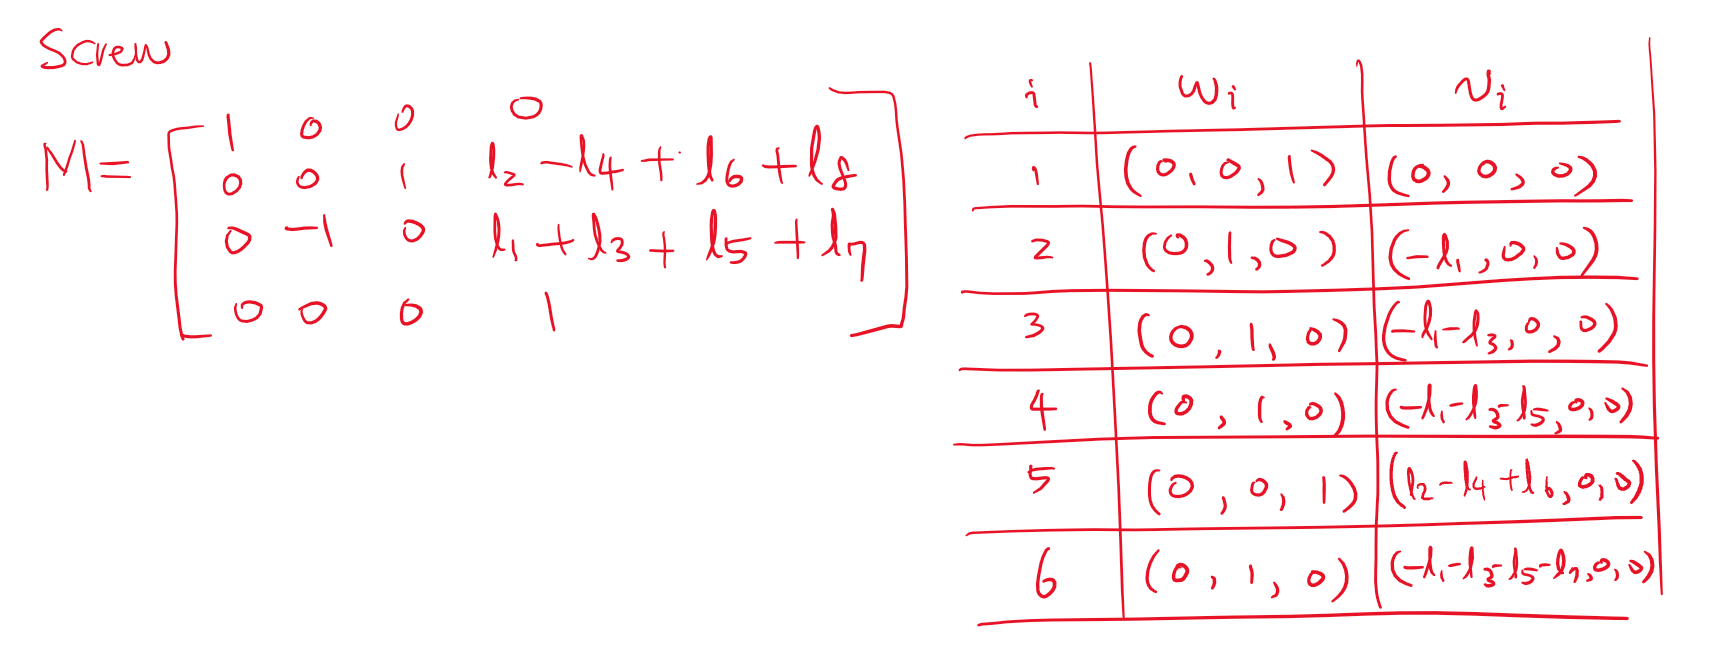

In [20]:
Image('figure/ur5_coppellia_sim_screw2.PNG', width=500)

In [21]:
import modern_robotics as mr
import numpy as np

L1=89.159/1e3
L2=135.85/1e3
L3=425/1e3
L4=119.7/1e3
L5=392.25/1e3
L6=93/1e3
L7=94.65/1e3
L8=82.3/1e3

M = np.array([[1, 0,  0, 0],
              [0, 0,  1, L2-L4+L6+L8],
              [0, -1, 0, L1+L3+L5+L7],
              [0, 0,  0, 1]])
Slist = np.array([[0, 0, 1, 0, 0, 0],
                  [0, 1, 0, -L1, 0, 0],
                  [0, 1, 0, -L1-L3, 0, 0],
                  [0, 1, 0, -L1-L3-L5, 0, 0],
                  [0, 0, 1, L2-L4+L6, 0, 0],
                  [0, 1, 0, -L1-L3-L5-L7, 0, 0]]).T
thetalist = np.array([0,0,0,0,0,0])
M, Slist, thetalist

(array([[ 1.      ,  0.      ,  0.      ,  0.      ],
        [ 0.      ,  0.      ,  1.      ,  0.19145 ],
        [ 0.      , -1.      ,  0.      ,  1.001059],
        [ 0.      ,  0.      ,  0.      ,  1.      ]]),
 array([[ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ],
        [ 0.      ,  1.      ,  1.      ,  1.      ,  0.      ,  1.      ],
        [ 1.      ,  0.      ,  0.      ,  0.      ,  1.      ,  0.      ],
        [ 0.      , -0.089159, -0.514159, -0.906409,  0.10915 , -1.001059],
        [ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ],
        [ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ]]),
 array([0, 0, 0, 0, 0, 0]))

In [22]:
mr.FKinSpace(M, Slist, thetalist)

array([[ 1.      ,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  1.      ,  0.19145 ],
       [ 0.      , -1.      ,  0.      ,  1.001059],
       [ 0.      ,  0.      ,  0.      ,  1.      ]])

In [23]:
thetalist = np.array([np.pi/2,np.pi/2,0,np.pi/2,0,0])
mr.FKinSpace(M, Slist, thetalist)

array([[-1.11022302e-16, -2.46519033e-32, -1.00000000e+00,
        -1.91450000e-01],
       [-1.00000000e+00, -2.22044605e-16,  1.11022302e-16,
         8.17250000e-01],
       [-2.22044605e-16,  1.00000000e+00,  0.00000000e+00,
        -5.49100000e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [24]:
T06.subs({theta1:sympy.pi/2,theta2:sympy.pi/2,theta3:0,
          theta4:sympy.pi/2,theta5:0,theta6:0,
          l1:89.159/1e3,l2:135.85/1e3,l3:425/1e3,l4:119.7/1e3,
          l5:392.25/1e3,l6:93/1e3,l7:94.65/1e3,l8:82.3/1e3})

⎡0   0  -1        -0.19145      ⎤
⎢                               ⎥
⎢-1  0  0         0.81725       ⎥
⎢                               ⎥
⎢0   1  0   -0.00549100000000001⎥
⎢                               ⎥
⎣0   0  0            1          ⎦

In [25]:
#### Symbolic Modern Robotics 라이브러리로 검산

In [26]:
import symbolic_modern_robotics as smr

In [27]:
#theta1,theta2,theta3,theta4,theta5,theta6 = sympy.symbols('theta1,theta2,theta3,theta4,theta5,theta6')
M_s = sympy.Matrix([[1, 0,  0, 0],
              [0, 0,  1, l2-l4+l6+l8],
              [0, -1, 0, l1+l3+l5+l7],
              [0, 0,  0, 1]])
Slist_s = sympy.Matrix([[0, 0, 1, 0, 0, 0],
                  [0, 1, 0, -l1, 0, 0],
                  [0, 1, 0, -l1-l3, 0, 0],
                  [0, 1, 0, -l1-l3-l5, 0, 0],
                  [0, 0, 1, l2-l4+l6, 0, 0],
                  [0, 1, 0, -l1-l3-l5-l7, 0, 0]]).T
thetalist_s = sympy.Matrix([theta1,theta2,theta3,theta4,theta5,theta6])
M_s, Slist_s, thetalist_s

⎛                               ⎡0   0      0            0             0      
⎜                               ⎢                                             
⎜⎡1  0   0          0        ⎤  ⎢0   1      1            1             0      
⎜⎢                           ⎥  ⎢                                             
⎜⎢0  0   1  l₂ - l₄ + l₆ + l₈⎥  ⎢1   0      0            0             1      
⎜⎢                           ⎥, ⎢                                             
⎜⎢0  -1  0  l₁ + l₃ + l₅ + l₇⎥  ⎢0  -l₁  -l₁ - l₃  -l₁ - l₃ - l₅  l₂ - l₄ + l₆
⎜⎢                           ⎥  ⎢                                             
⎜⎣0  0   0          1        ⎦  ⎢0   0      0            0             0      
⎜                               ⎢                                             
⎝                               ⎣0   0      0            0             0      

          0         ⎤  ⎡θ₁(t)⎤⎞
                    ⎥  ⎢     ⎥⎟
          1         ⎥  ⎢θ₂(t)⎥⎟
                    ⎥  ⎢     ⎥⎟
  

In [28]:
#smr.FKinSpace(M_s, Slist_s, thetalist_s)

In [29]:
import numpy as np
import math

#### CoppelliaSim 연결하고, 간단한 Position Control
##### Open "CoppelliaSim_Scene_File\UR5_FK.ttt" and Run simulation using play button

In [41]:
import sim as vrep
import time
print('Program started')

# Close potential connections
vrep.simxFinish(-1) # just in case, close all opened connections

# Python connect to the V-REP client
clientID = vrep.simxStart('127.0.0.1', 19999, True, True, 5000, 5)
if clientID != -1:
    print ('Connected to remote API server')
    
    return_code, object_handle = vrep.simxGetObjects(clientID, vrep.sim_handle_all, vrep.simx_opmode_blocking)
    if return_code == vrep.simx_return_ok:
        print("Number of Objects in the scene: ", len(object_handle))
    
    return_code, ur5_handle = vrep.simxGetObjectHandle(clientID, "UR5", vrep.simx_opmode_oneshot_wait)      
    if (return_code == vrep.simx_return_ok):
        print('get object UR5 ok.')
        #print(ur5_handle)
       
    # Prepare initial values for five arm joints
    arm_joints_handle = [-1,-1,-1,-1,-1,-1]
    for i in range(0,len(arm_joints_handle)):
        return_code, arm_joints_handle[i] = vrep.simxGetObjectHandle(clientID, 'UR5_joint' + str(i+1), vrep.simx_opmode_blocking)
        if (return_code == vrep.simx_return_ok):
            print('get object arm joint ' + str(i+1) + ' ok.')
    
    # Desired joint positions for initialization
    desired_arm_joint_angles = [0, 0, 0, 0, 0, 0]
    
    # Initialization all arm joints
    for i in range(0,len(arm_joints_handle)):
        vrep.simxSetJointTargetPosition(clientID, arm_joints_handle[i], desired_arm_joint_angles[i], vrep.simx_opmode_blocking)   
else:
    print ('Failed connecting to remote API server')        
        
#####
def VREP_armControl(clientID, arm_joints_handle, desired_arm_joint_angles):
    for i in range(0, len(arm_joints_handle)):
        # important! use simxSetJointTargetPosition, not simxSetJointPosition
        vrep.simxSetJointTargetPosition(clientID, arm_joints_handle[i], desired_arm_joint_angles[i], vrep.simx_opmode_oneshot)
      
# Position Control
desired_arm_joint_angles = [0, 0, 0, 0, 0, 0] # input as degree
VREP_armControl(clientID, arm_joints_handle, np.array(desired_arm_joint_angles)*np.pi/180)

# Get UR5 arm joint angles
ur5_arm_q = [0, 0, 0, 0, 0, 0]
for j in range(0, len(arm_joints_handle)):
    _, ur5_arm_q[j] = vrep.simxGetJointPosition(clientID, arm_joints_handle[j], vrep.simx_opmode_blocking)
print(ur5_arm_q)
      
##### Stop simulation
#vrep.simxStopSimulation(clientID, vrep.simx_opmode_blocking)  # stopping Vrep Simulation
time.sleep(0.1)

##### Close the connection to V-REP
#vrep.simxFinish(clientID)
#print('Program end')

Program started
Connected to remote API server
Number of Objects in the scene:  104
get object UR5 ok.
get object arm joint 1 ok.
get object arm joint 2 ok.
get object arm joint 3 ok.
get object arm joint 4 ok.
get object arm joint 5 ok.
get object arm joint 6 ok.
[-0.005838155746459961, 0.046195030212402344, -0.20254731178283691, -1.7067985534667969, 8.606910705566406e-05, -2.5033950805664062e-05]


In [42]:
x_des = np.array([-0.2, -0.4, 0.6])
theta_0 = np.array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001])

theta = numerical_IK(x_des, theta_0)

In [43]:
desired_arm_joint_angles = np.degrees(theta) # input as degree
VREP_armControl(clientID, arm_joints_handle, np.array(desired_arm_joint_angles)*np.pi/180)

In [44]:
# Check End-effector Position
__, link0 = vrep.simxGetObjectHandle(clientID, "Origin", vrep.simx_opmode_oneshot_wait)
__, link7 = vrep.simxGetObjectHandle(clientID, "MicoHand", vrep.simx_opmode_oneshot_wait)
__, pos = vrep.simxGetObjectPosition(clientID, link7, link0, vrep.simx_opmode_blocking)
pos

In [ ]:
##### Close the connection to V-REP
vrep.simxFinish(clientID)
print('Program end')